In [12]:
%matplotlib inline
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt
from matplotlib.colors import SymLogNorm
import numpy as np

In [5]:
t = Table.read('/home/aalvarez/Work/Data/sim09/sex.out.fits', hdu=2)

In [20]:
t.colnames

['X_IMAGE', 'Y_IMAGE', 'PETRO_RADIUS', 'FLUX_PETRO', 'FLUXERR_PETRO', 'VIGNET']

In [79]:
img = fits.open('/home/aalvarez/Work/Data/sim09/sim09_r_01.fits')[0]
bg = fits.open('/home/aalvarez/Work/Data/sim09/back.fits')[0]

In [80]:
# IMPORTANTE, SIN ESCALAR
#img.data *= img.header['FLXSCALE'] 

In [81]:
img = img.data - bg.data

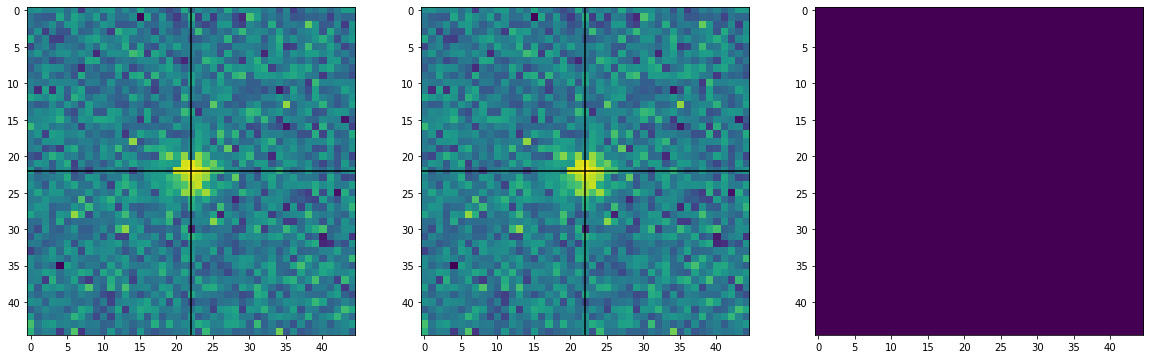

In [82]:
idx = 10

x = int(np.round(t[idx]['X_IMAGE']))
y = int(np.round(t[idx]['Y_IMAGE']))

cutout = img[y-(45//2)-1:y+(45//2),x-(45//2)-1:x+(45//2)]
vignet = t[idx]['VIGNET'].reshape(45,45)

fig, axes = plt.subplots(ncols=3, figsize=(20, 20))
axes[0].imshow(vignet, norm=SymLogNorm(100))
axes[0].axhline(22, 0, 45, c='black')
axes[0].axvline(22, 0, 45, c='black')
axes[1].imshow(cutout, norm=SymLogNorm(100))
axes[1].axhline(22, 0, 45, c='black')
axes[1].axvline(22, 0, 45, c='black')
axes[2].imshow(cutout - vignet)

plt.show()

In [73]:
cutout[0,0]

14.949402

In [74]:
vignet[0,0]

14.949402

In [76]:
(cutout-vignet).max()

0.0